# Linear Regression (Closed Form)

## An implementation of linear regression using Julia's plots

In [1]:
using Pkg
#Pkg.add("CSV")
#Pkg.add("DataFrames")
using CSV
using DataFrames
using Plots
using Random
#using Datasets

In [30]:
salary = CSV.read("salary.csv", DataFrame)
convert(Matrix, salary[:,:])
x_data = salary[:,1]
print(x_data)
println()
println()
y_data = salary[:,2]
print(y_data)

[1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5, 11.2, 11.5, 12.3, 12.9, 13.5]

[39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940, 91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756, 128765, 135675, 139465]

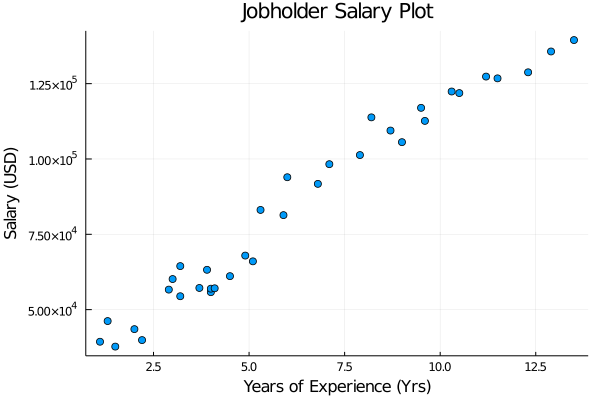

In [31]:
data = [x for x in zip(x_data, y_data)]

scatter([p for p in data],
        xaxis = "Years of Experience (Yrs)",
        yaxis = "Salary (USD)",
        title = "Jobholder Salary Plot",
        legend = false)

In [32]:
# Randomly select data points from the full data set to make a training data set
train_x = randsubseq(x_data, 0.5)
print("train_x:",train_x)
println()
println()

train_y = [x[2] for x in data if x[1] in train_x]
print("train_y:",train_y)
println()
println()            
            
train_data = [x for x in zip(train_x, train_y)]
print("train_data:",train_data)
println()
println()
            
test_data = [x for x in data if x ∉ train_data]
print("test_data:",test_data)                        
                        

train_x:[1.3, 1.5, 2.0, 2.2, 2.9, 3.7, 3.9, 4.1, 4.5, 4.9, 5.3, 7.9, 9.0, 9.5, 10.3, 10.5, 11.2, 12.3, 12.9, 13.5]

train_y:[46205, 37731, 43525, 39891, 56642, 57189, 63218, 57081, 61111, 67938, 83088, 101302, 105582, 116969, 122391, 121872, 127345, 128765, 135675, 139465]

train_data:[(1.3, 46205), (1.5, 37731), (2.0, 43525), (2.2, 39891), (2.9, 56642), (3.7, 57189), (3.9, 63218), (4.1, 57081), (4.5, 61111), (4.9, 67938), (5.3, 83088), (7.9, 101302), (9.0, 105582), (9.5, 116969), (10.3, 122391), (10.5, 121872), (11.2, 127345), (12.3, 128765), (12.9, 135675), (13.5, 139465)]

test_data:[(1.1, 39343), (3.0, 60150), (3.2, 54445), (3.2, 64445), (4.0, 55794), (4.0, 56957), (5.1, 66029), (5.9, 81363), (6.0, 93940), (6.8, 91738), (7.1, 98273), (8.2, 113812), (8.7, 109431), (9.6, 112635), (11.5, 126756)]

In [33]:
# First make the matrix X
X = ones(length(train_x), 2)
print(X)
println()
println()
X[:, 1] = train_x

# Next solve for ŵ
ŵ = (X'*X)\(X'*train_y)

# Note: Ax=b, then x=A\b solves the system 

[1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0; 1.0 1.0]



2-element Array{Float64,1}:
  8667.187451902664
 27839.10969580922

In [6]:
# Define the regression line (the prediction function)
prediction(x) = ŵ[1]*x + ŵ[2];

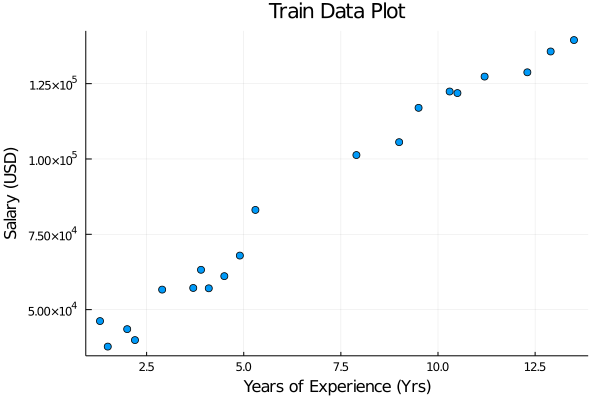

In [39]:
# Plot train data
scatter([p for p in train_data],
        xaxis = "Years of Experience (Yrs)",
        yaxis = "Salary (USD)",
        title = "Train Data Plot",
        legend = false)

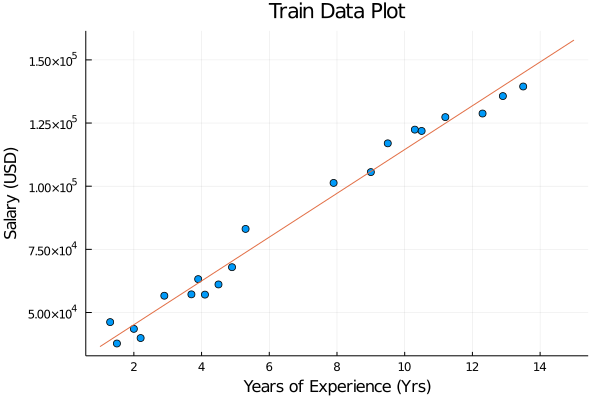

In [40]:
# Plot train data with prediction line
plot!([(x, prediction(x)) for x = 1:15])

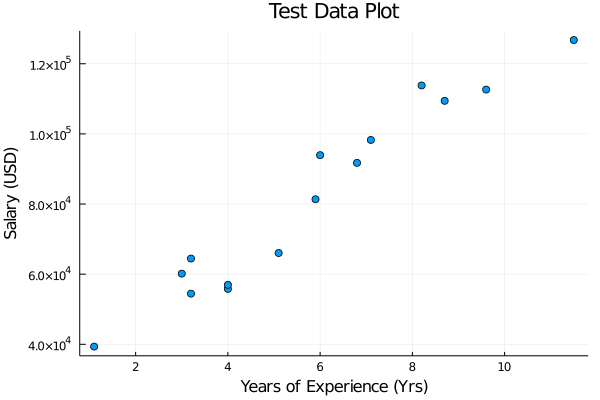

In [41]:
# Plot test data
scatter([p for p in test_data],
        xaxis = "Years of Experience (Yrs)",
        yaxis = "Salary (USD)",
        title = "Test Data Plot",
        legend = false)

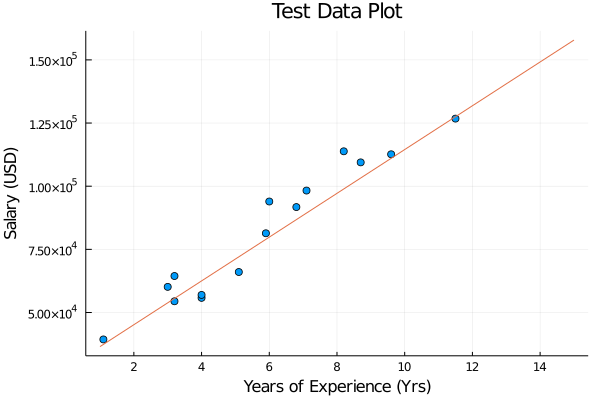

In [42]:
# Plot test data with prediction line
plot!([(x, prediction(x)) for x = 1:15])

In [43]:
# Calculate error distance between data poitns
error_array = [abs(prediction(x[1]) - x[2]) for x in train_data]

20-element Array{Float64,1}:
 7098.5466167173145
 3108.8908736632147
 1648.484599614545
 7015.9220899950815
 3668.046693673052
 2718.7032678490796
 1576.8592417703912
 6293.578248610138
 5730.453229371211
 2370.328210132284
 9312.796809106658
 4992.10943415972
  261.7967629331979
 6791.609511115472
 5279.859549593326
 3027.4220592127967
 2433.3908428809373
 5680.515354211995
 3970.8278253535973
 5381.14029649517

In [44]:
maximum(error_array)

9312.796809106658

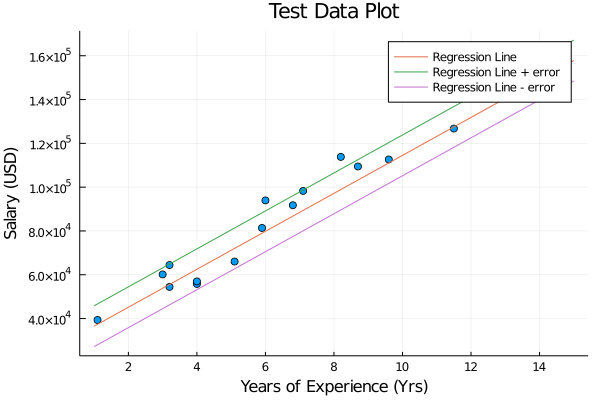

In [49]:
# Plot regression line within error
scatter([p for p in test_data],
        label = false,
        xaxis = "Years of Experience (Yrs)",
        yaxis = "Salary (USD)",
        title = "Test Data Plot")
        
plot!([(x, prediction(x)) for x = 1:15],
        label = "Regression Line")

plot!([(x, prediction(x) + maximum(error_array)) for x = 1:15],
        label = "Regression Line + error")

plot!([(x, prediction(x) - maximum(error_array)) for x = 1:15],
        label = "Regression Line - error")

In [50]:
prediction_interval(x) = (prediction(x) - maximum(error_array), prediction(x) + maximum(error_array))

prediction_interval (generic function with 1 method)

In [51]:
test_data

15-element Array{Tuple{Float64,Int64},1}:
 (1.1, 39343)
 (3.0, 60150)
 (3.2, 54445)
 (3.2, 64445)
 (4.0, 55794)
 (4.0, 56957)
 (5.1, 66029)
 (5.9, 81363)
 (6.0, 93940)
 (6.8, 91738)
 (7.1, 98273)
 (8.2, 113812)
 (8.7, 109431)
 (9.6, 112635)
 (11.5, 126756)

In [52]:
prediction_interval(41)

(373880.9984147118, 392506.5920329251)